In [1]:
# importando bibliotecas necessárias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# vamos importar os dados 
data = pd.read_csv("german_credit_data.csv", header=(0))

# informações acerca dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
# pré-visualização das 30 primeiras linhas dos dados
data.head(30)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


# Descrição das Variáveis: Conjunto de Dados de Crédito


## Variáveis

### Age (numérico)
Idade do cliente, em anos.  
Exemplo: 35, 67.

### Sex (texto)
Sexo do cliente. Valores possíveis:
- male: masculino  
- female: feminino


### Job (numérico)
Classificação ocupacional do cliente, representada por códigos:
- 0: não qualificado e não residente  
- 1: não qualificado, mas residente  
- 2: qualificado  
- 3: altamente qualificado

### Housing (texto)
Situação de moradia do cliente. Valores possíveis:
- own: imóvel próprio  
- rent: imóvel alugado  
- free: moradia sem custo (ex.: mora com parentes)

### Saving accounts (texto)
Categoria da conta de poupança do cliente (indicador de patrimônio / reservas). Valores possíveis:
- little: pouco  
- moderate: moderado  
- quite rich: relativamente rico  
- rich: rico  
- NaN ou unknown: informação ausente/desconhecida

### Checking account (numérico / categórico)
Saldo na conta corrente.

### Credit amount (numérico)
Valor do crédito solicitado/concedido, em Deutsch Mark (DM).  
Exemplo: 1169, 5951.

### Duration (numérico)
Duração do crédito em meses.  
Exemplo: 6, 48.

### Purpose (texto)
Finalidade do crédito. Exemplos:
- car
- furniture/equipment
- radio/TV

### Risk (target, categórico)
Variável alvo (target) que indica o risco de crédito do cliente:
- Good: bom risco / bom pagador  
- Bad: mau risco / inadimplente

### Vamos remover as colunas de Idade e Sexo para evitar viés discriminatório. Variáveis como idade e sexo podem introduzir vieses inconscientes na avaliação de crédito.


In [4]:
data = data.drop(columns=['Sex', 'Age'])
data = data.drop(columns=['Unnamed: 0']) # revome coluna 'Unnamed: 0'
data

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2,own,NaN,little,1169,6,radio/TV,good
1,2,own,little,moderate,5951,48,radio/TV,bad
2,1,own,little,NaN,2096,12,education,good
3,2,free,little,little,7882,42,furniture/equipment,good
4,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...
995,1,own,little,NaN,1736,12,furniture/equipment,good
996,3,own,little,little,3857,30,car,good
997,2,own,little,NaN,804,12,radio/TV,good
998,2,free,little,little,1845,45,radio/TV,bad


### Vamos ver as colunas que possuem NaN


In [5]:
print(data.isna().mean() * 100)

Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64


# Decidindo o que iremos fazer com os dados faltantes

## Para Checking account (39.4%) e para Saving accounts (18.3%) vamos criar uma categoria "unknown". Esta decisão foi tomada pelo fato do conjunto de dados ser muito pequeno.



In [6]:
data['Checking account'] = data['Checking account'].fillna('unknown')
data['Saving accounts'] = data['Saving accounts'].fillna('unknown')

data

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2,own,unknown,little,1169,6,radio/TV,good
1,2,own,little,moderate,5951,48,radio/TV,bad
2,1,own,little,unknown,2096,12,education,good
3,2,free,little,little,7882,42,furniture/equipment,good
4,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...
995,1,own,little,unknown,1736,12,furniture/equipment,good
996,3,own,little,little,3857,30,car,good
997,2,own,little,unknown,804,12,radio/TV,good
998,2,free,little,little,1845,45,radio/TV,bad


### Vamos verificar se possui linhas duplicadas

In [7]:
# Retorna True na posição em que há uma linha duplicada
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
#Procurando valores únicos
data.nunique()


Job                   4
Housing               3
Saving accounts       5
Checking account      4
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

# Agora vamos vizualizar algumas informações dos dados 



### primeiro iremos quantificar os "good" e os "bad" pagadores

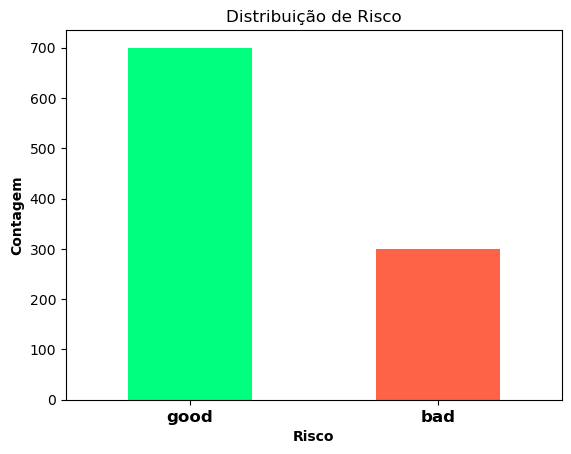

In [9]:
### Contando os clientes "bad" e "good" ###

data['Risk'].value_counts().plot(kind='bar', color=['springgreen', 'tomato'])
plt.title('Distribuição de Risco')
plt.xlabel('Risco', weight='bold')
plt.ylabel('Contagem', weight='bold')
plt.xticks(rotation=0, fontsize = 12, weight='bold')
plt.show()

### Como podemos observar no gráfico de barras acima, em nosso conjunto de dados, os maus pagadores representam cerca de 30% dos clientes. Isto mostra que os dados estão desbalanceados. Isto pode causar problemas na hora do treinamento do classificador. 

## Como nosso principal objetivo é classificar o score de crédito dos clientes, iremos relacionar cada categoria com o risco de crédito. Nas próximas análises, buscamos entender como cada feature está associada com o risco de inadiplência. 

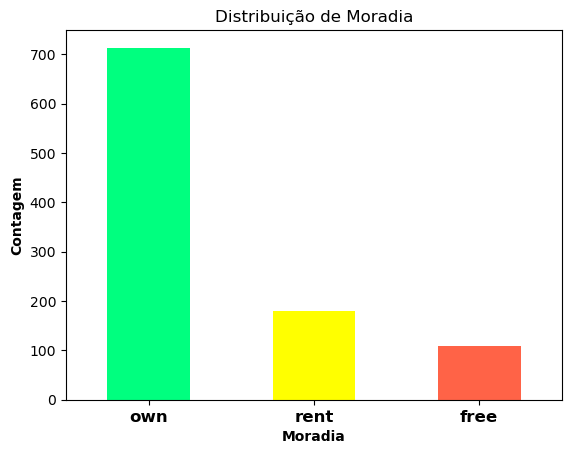

In [10]:

### Contando os clientes "bad" e "good"  por tipo de moradia ###

data['Housing'].value_counts().plot(kind='bar', color=['springgreen', "yellow", 'tomato'])
plt.title('Distribuição de Moradia')
plt.xlabel('Moradia', weight='bold')
plt.ylabel('Contagem', weight='bold')
plt.xticks(rotation=0, fontsize = 12, weight='bold')
plt.show()

### No gráfico de barras acima, contabilizamos o tipo de moradia dos clientes. Observamos que a maior parte dos clientes (~70%) possuem moradia própra. Podemos concluir também que ~20% dos clientes pagam aluguel enquanto que ~10% dos clientes não pagam por moradia. 

### No próximo resultado, iremos comparar o tipo de moradia com o risco de crédito associado. 

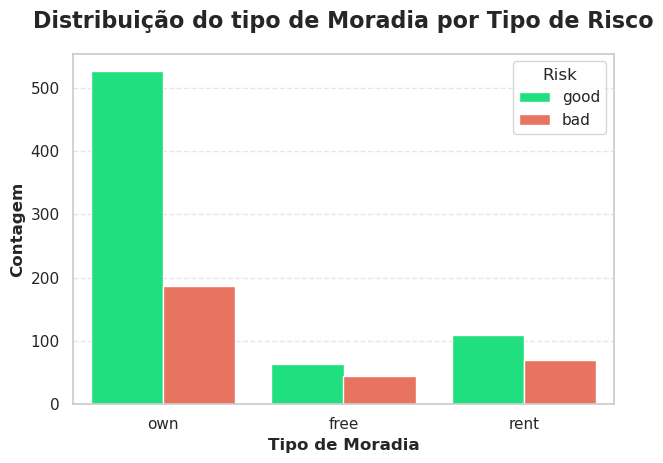

In [11]:

sns.set_theme(style="whitegrid")

# Criação dos dois gráficos lado a lado
g = sns.countplot(
    data=data,
    x="Housing",
    hue="Risk",
    palette=['springgreen', 'tomato'],  
    
)

# Personalização
g.set_xlabel("Tipo de Moradia", fontsize=12, weight='bold')
g.set_ylabel("Contagem", fontsize=12, weight='bold')
plt.title("Distribuição do tipo de Moradia por Tipo de Risco", fontsize=16, weight='bold', y=1.05)


g.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### No gráfico acima comparamos cada tipo de moradia e quantificamos os clientes entre "good" e "bad". Para os clientes com moradia própria, observamos que a quantidade de bons pagadores supera a os maus pagadores. Aproximadamente 70% dos clientes com casa própria são bons pagadores. 

### No entanto, clientes que pagam aluguel ou que não possuem gasto fixo com moradia não mostraram uma diferença importante. Podemos observar que a quantidade de bons e maus pagadores são bem próximas. 

### Com isso, concluimos que o tipo de moradia não é um indicador muito determinante para o risco de crédito. 

### No próximo resultado, iremos relacionar o risco de crédito com a número de parcelas. 



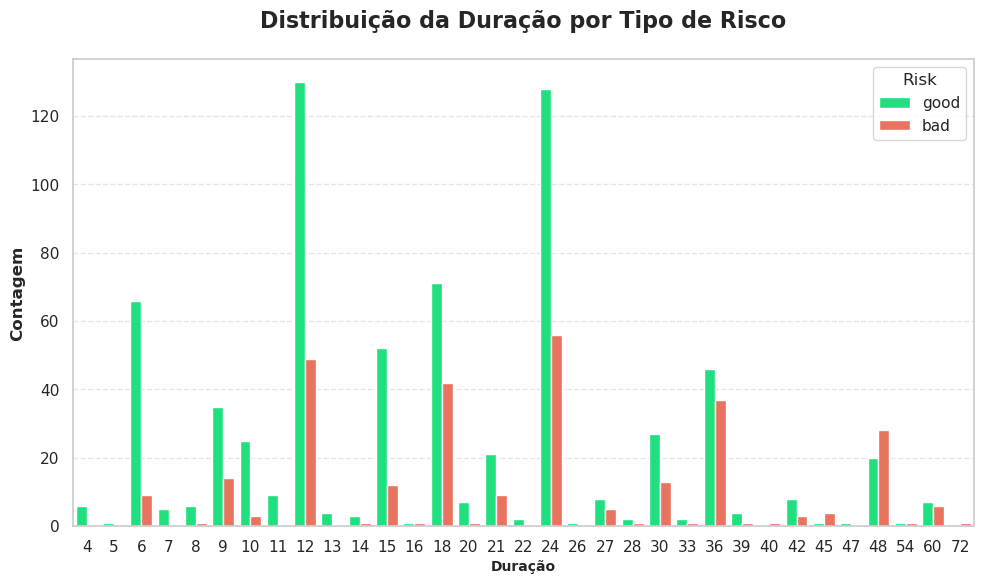

In [12]:
plt.figure(figsize = (10,6))

sns.set_theme(style="whitegrid")

# Criação dos dois gráficos lado a lado
g = sns.countplot(
    data=data,
    x="Duration",
    hue="Risk",
    palette=['springgreen', 'tomato'],  
    
)

# Personalização
g.set_xlabel("Duração", fontsize=10, weight='bold')
g.set_ylabel("Contagem", fontsize=12, weight='bold')
plt.title("Distribuição da Duração por Tipo de Risco", fontsize=16, weight='bold', y=1.05)


g.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Analisando os resultados da figura acima concluimos que a quantidade de parcelas tem forte relação com o risco de crédito. Podemos observar que quanto menor for o número de parcelas, maior será o número de bons pagadores. Note que a partir de 27 parcelas, a relação entre bons e maus pagadores começa a ficar balanceada. 

### No próximo resultado, iremos relacionar o risco de crédito com a poupança. O valor em poupança caracteriza a classe social do indivíduo. 

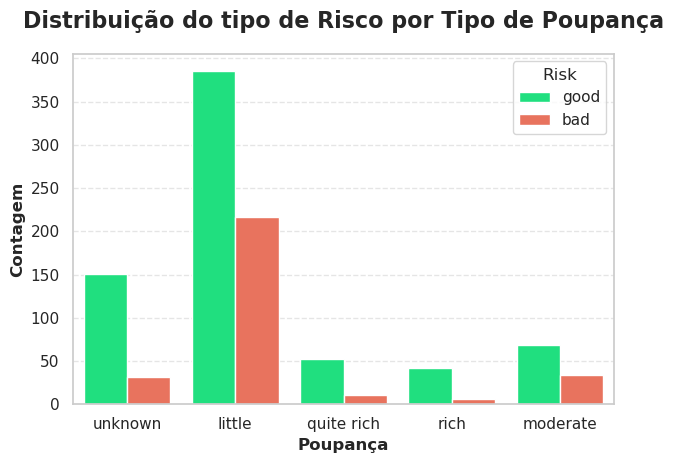

In [13]:

sns.set_theme(style="whitegrid")

# Criação dos dois gráficos lado a lado
g = sns.countplot(
    data=data,
    x="Saving accounts",
    hue="Risk",
    palette=['springgreen', 'tomato'],  
    
)

# Personalização
g.set_xlabel("Poupança", fontsize=12, weight='bold')
g.set_ylabel("Contagem", fontsize=12, weight='bold')
plt.title("Distribuição do tipo de Risco por Tipo de Poupança", fontsize=16, weight='bold', y=1.05)


g.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Temos mais um caso de forte influência no risco de crédito. No gráfico acima observamos que quanto maior a poupança, menor é o risco de crédito. Também observamos que a categoria "unknown" é composta por bons pagadores em sua maioria. 

### Para entender esta classe desconhecidas, iremos fazer um gráfico do tipo violino para comparar ela com uma outra distribuição. 

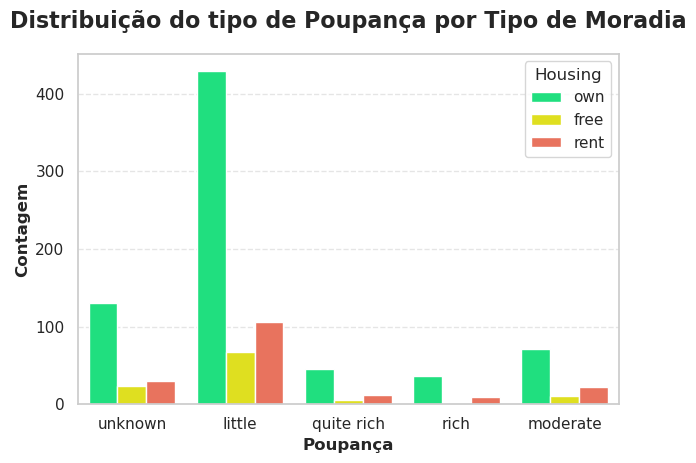

In [14]:
sns.set_theme(style="whitegrid")

# Criação dos dois gráficos lado a lado
g = sns.countplot(
    data=data,
    x="Saving accounts",
    hue="Housing",
    palette=['springgreen', 'yellow', 'tomato'],  
    
)

# Personalização
g.set_xlabel("Poupança", fontsize=12, weight='bold')
g.set_ylabel("Contagem", fontsize=12, weight='bold')
plt.title("Distribuição do tipo de Poupança por Tipo de Moradia", fontsize=16, weight='bold', y=1.05)


g.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Ao comparar a poupança dos clientes com o tipo de moradia, observamos que a categoria "unknown" é composta, em sua maioria, por pessoas que possuem casa própria. Isto explica o motivo desta classe ser formada por bons pagadores. 

### Outra conclusão que podemos extrair dos dados é que os clientes com poupança pequena formam a maioria. 

### Nos próximos resultados, mostraremos a relação entre risco e saldo na conta corrente.

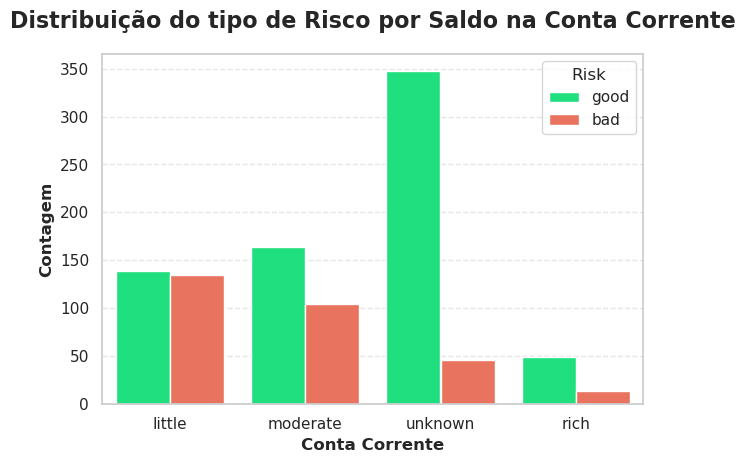

In [15]:
sns.set_theme(style="whitegrid")

# Criação dos dois gráficos lado a lado
g = sns.countplot(
    data=data,
    x="Checking account",
    hue="Risk",
    palette=['springgreen', 'tomato'],  
    
)

# Personalização
g.set_xlabel("Conta Corrente", fontsize=12, weight='bold')
g.set_ylabel("Contagem", fontsize=12, weight='bold')
plt.title("Distribuição do tipo de Risco por Saldo na Conta Corrente", fontsize=16, weight='bold', y=1.05)


g.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()






### Aqui notamos mais uma vez uma feature que caracteriza muito bem o risco de crédito. Nesta análise, observamos claramente que o saldo quanto maior for o saldo na conta corrente, menor será o risco de crédito. 

### Neste caso, estamos concluindo que a categoria "unknown" possui um bom saldo na conta corrente, visto que ateriormente, mostramos que estes indivíduos possuem casa própria. 

<Figure size 1500x800 with 0 Axes>

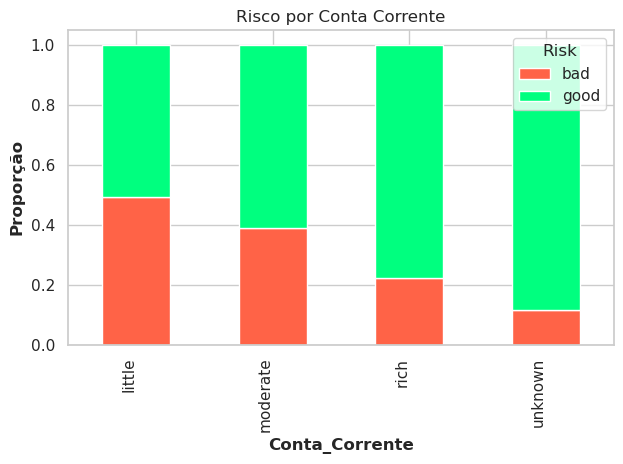

In [16]:
plt.figure(figsize=(15, 8))
combo_risk = pd.crosstab(data['Checking account'], data['Risk'], normalize='index')
combo_risk_sorted = combo_risk.sort_values('bad', ascending=False)

combo_risk_sorted.plot(kind='bar', stacked=True, color=['tomato', 'springgreen'])
plt.title('Risco por Conta Corrente')
plt.xlabel('Conta_Corrente', weight='bold')
plt.ylabel('Proporção', weight='bold')
plt.legend(title='Risk')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

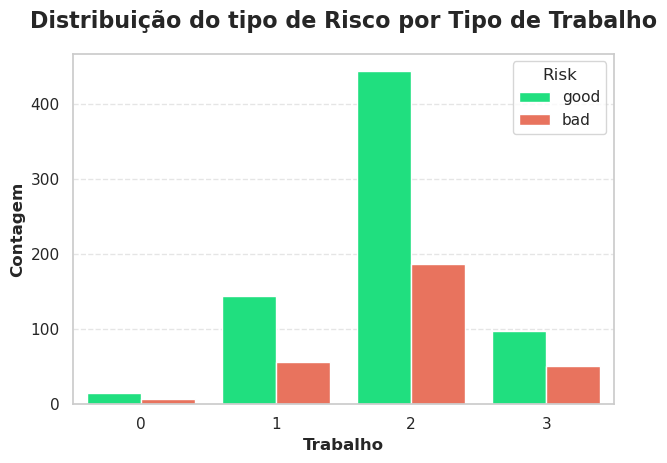

In [17]:
sns.set_theme(style="whitegrid")

# Criação dos dois gráficos lado a lado
g = sns.countplot(
    data=data,
    x="Job",
    hue="Risk",
    palette=['springgreen', 'tomato'],  
    
)

# Personalização
g.set_xlabel("Trabalho", fontsize=12, weight='bold')
g.set_ylabel("Contagem", fontsize=12, weight='bold')
plt.title("Distribuição do tipo de Risco por Tipo de Trabalho", fontsize=16, weight='bold', y=1.05)


g.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Aqui podemos observar que o tipo de trabalho não é um bom parâmetro para julgar o risco de crédito. Como já sabemos que o número bons pagadores dominam nossos dados, a conclusão que temos é que para cada tipo de trabalho o risco está bem equilibrado. 

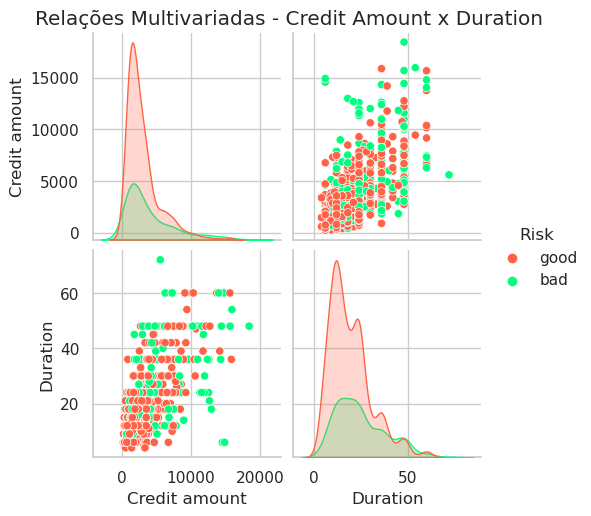

In [18]:
# Criando um pairplot com hue por Risk
sns.pairplot(data[['Credit amount', 'Duration', 'Risk']], 
             hue='Risk', palette=['tomato', 'springgreen'])
plt.suptitle('Relações Multivariadas - Credit Amount x Duration ', y=1.02)
plt.show()

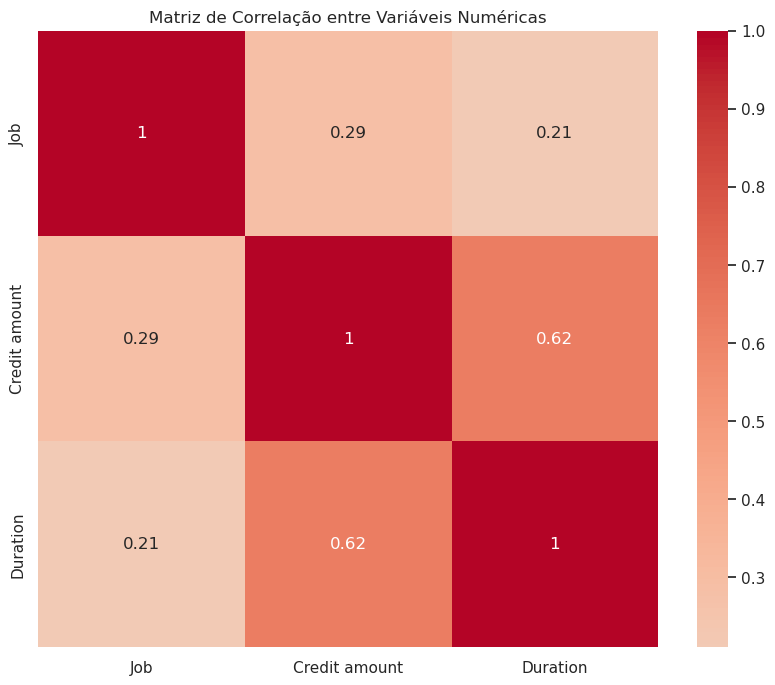

In [19]:
# Criando uma matriz de correlação para variáveis numéricas


plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

<Figure size 1400x800 with 0 Axes>

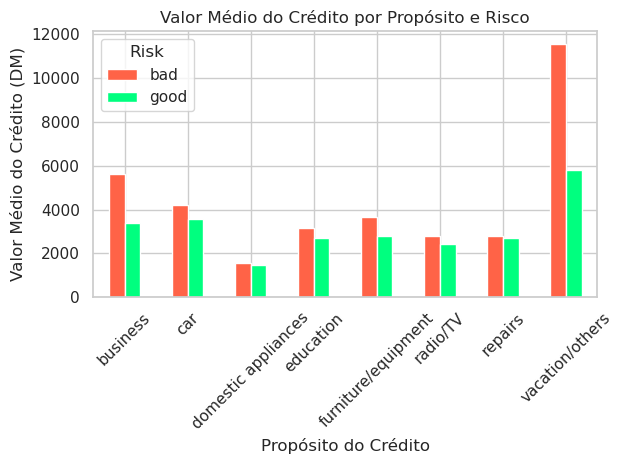

In [20]:
# Valor médio do crédito por propósito e risco
plt.figure(figsize=(14, 8))
credit_purpose = data.groupby(['Purpose', 'Risk'])['Credit amount'].mean().unstack()
credit_purpose.plot(kind='bar', color=['tomato', 'springgreen'])
plt.title('Valor Médio do Crédito por Propósito e Risco')
plt.xlabel('Propósito do Crédito')
plt.ylabel('Valor Médio do Crédito (DM)')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()
plt.show()

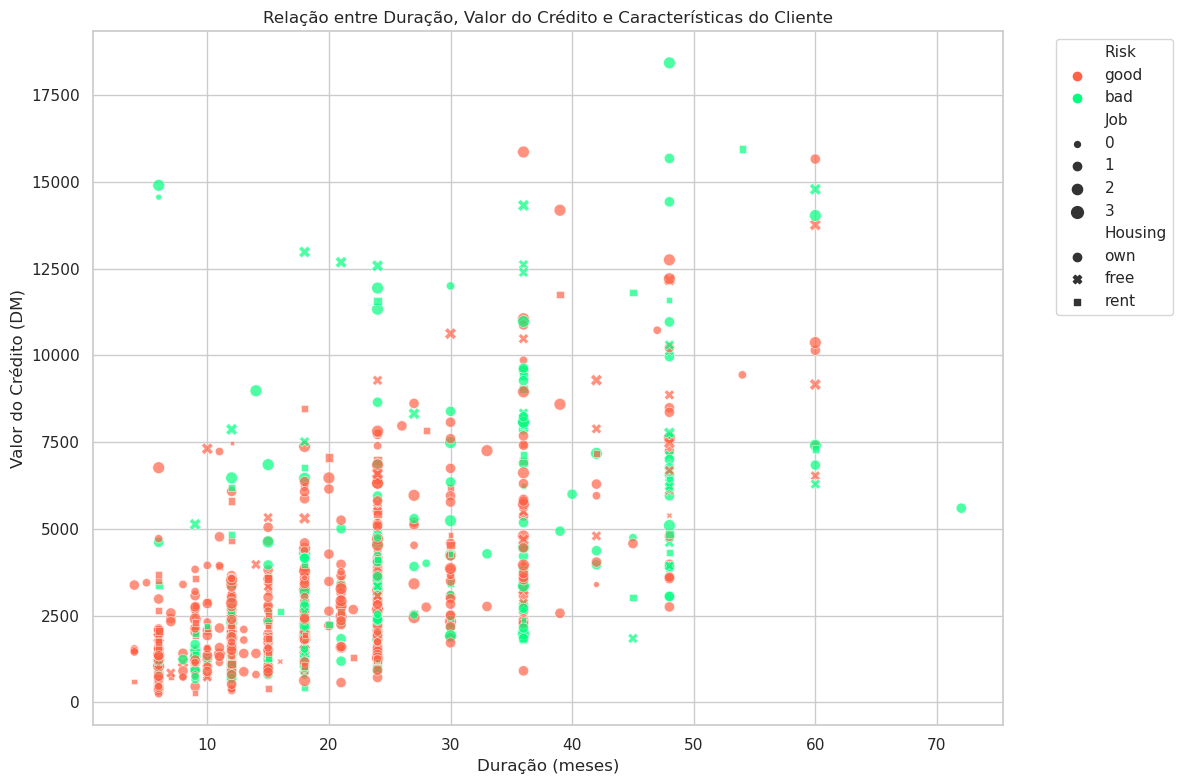

In [21]:
# Scatter plot com mais informações
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=data, x='Duration', y='Credit amount', 
                         hue='Risk', style='Housing', size='Job',
                         palette=['tomato', 'springgreen'], alpha=0.7)
plt.title('Relação entre Duração, Valor do Crédito e Características do Cliente')
plt.xlabel('Duração (meses)')
plt.ylabel('Valor do Crédito (DM)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
# Análise detalhada da categoria "unknown"
unknown_analysis = data[data['Saving accounts'] == 'unknown'].groupby('Risk').agg({
    'Credit amount': 'mean',
    'Duration': 'mean',
    'Housing': lambda x: x.value_counts().index[0],
    'Job': lambda x: x.value_counts().index[0]
}).round(2)

print("Características dos clientes com Saving Accounts Unknown:")
print(unknown_analysis)

Características dos clientes com Saving Accounts Unknown:
      Credit amount  Duration Housing  Job
Risk                                      
bad         4362.06     22.72     own    2
good        3809.85     22.72     own    2


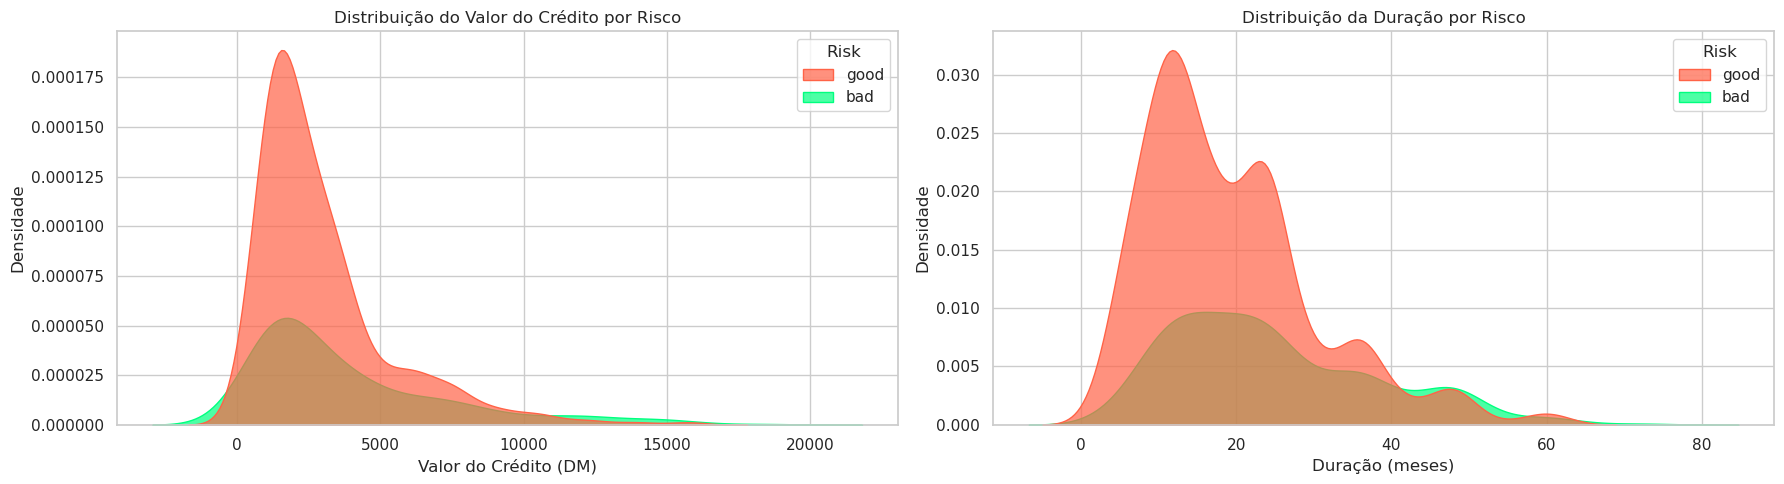

In [23]:
# Distribuição comparativa com KDE 
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Credit Amount
sns.kdeplot(data=data, x='Credit amount', hue='Risk', ax=axes[0], 
            palette=['tomato', 'springgreen'], fill=True, alpha=0.7)
axes[0].set_title('Distribuição do Valor do Crédito por Risco')
axes[0].set_xlabel('Valor do Crédito (DM)')
axes[0].set_ylabel('Densidade')

# Duration
sns.kdeplot(data=data, x='Duration', hue='Risk', ax=axes[1], 
            palette=['tomato', 'springgreen'], fill=True, alpha=0.7)
axes[1].set_title('Distribuição da Duração por Risco')
axes[1].set_xlabel('Duração (meses)')
axes[1].set_ylabel('Densidade')


plt.tight_layout()
plt.show()

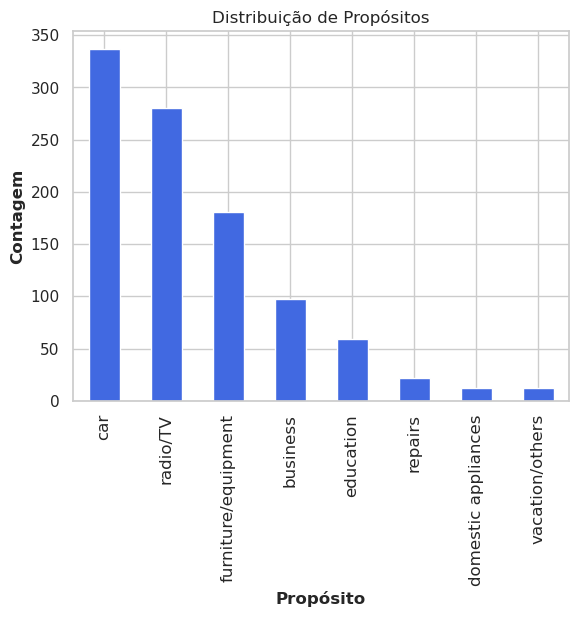

In [24]:
### Contando o propósito do crédito ###

data['Purpose'].value_counts().plot(kind='bar', color = "royalblue")
plt.title('Distribuição de Propósitos')
plt.xlabel('Propósito', weight='bold')
plt.ylabel('Contagem', weight='bold')
plt.xticks(rotation=90, fontsize = 12)
plt.show()

### A imagem acima mostra o objetivo dos clientes após receber o crédito. O gráfico compara a frequência de diferentes propósitos, sendo que a categoria "car" (carro) apresenta a maior contagem, com aproximadamente 350 ocorrências. Em seguida, aparecem as categorias "radio/TV" e "furniture/equipment" (móveis/equipamentos), com valores próximos ou superiores a 200.

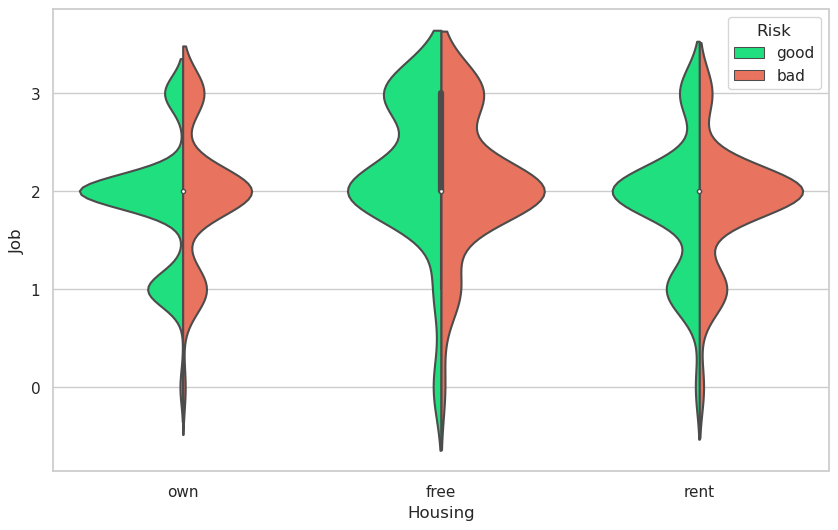

In [25]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",
                   y="Job",
                   data=data,
                   hue="Risk",
                   palette=["springgreen", "tomato"],
                   split=True)

g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)

plt.show()

### Para todas as categorias de moradia, a maioria dos clientes com risco bom está concentrada em empregos de nível 2 e 3. 

# Estou devendo análise de outras features, atualizarei o mais breve possível!


# Vamos verificar a importância das features usando o classificador Random Forest 


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [27]:
# preparando os dados 
df = data.copy() # Cria uma cópia do DataFrame original para não modificar os dados originais


### separando treino e teste

In [28]:
# Cria a variável X (features) removendo a coluna 'Risk' (todas as colunas exceto o target)
X = df.drop('Risk', axis=1) 

# Cria a variável y (target) com apenas a coluna 'Risk'
y = df['Risk']


# Divide os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)


# Identifica as colunas categóricas (do tipo texto/object)
cat_cols = X_train.select_dtypes('object').columns

# Cria o codificador
encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',  # evita erro se aparecer categoria nova no teste
    unknown_value=-1                     # valor usado para categorias desconhecidas
)

# Ajusta o encoder apenas com dados de treino e transforma ambos
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test[cat_cols]  = encoder.transform(X_test[cat_cols])


### criando e treinando o modelo

In [29]:
# modelo 
modelo = RandomForestClassifier(
    class_weight='balanced', # Cria o modelo com pesos balanceados
    n_estimators=300,   # número de árvores na floresta
    criterion="entropy",  # ganho de informação
    max_depth=10,    # profundidade máxima; None = sem limite
    min_samples_split=5,  # min samples para dividir um nó
    min_samples_leaf=4,  # min samples em uma folha
    max_features="sqrt", # número de features a considerar em cada split
    bootstrap=True,    # usar amostragem bootstrap
    oob_score=True,    # calcular oob_score (estimativa pela amostra fora do bootstrap)
    random_state=42, # semente
    n_jobs=-1         # usar todos os núcleos disponíveis
)


modelo.fit(X_train, y_train) # Treina o modelo usando os dados de treino (X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=300, n_jobs=-1,
                       oob_score=True, random_state=42)

In [30]:
print(classification_report(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

         bad       0.56      0.71      0.63        52
        good       0.87      0.77      0.82       128

    accuracy                           0.76       180
   macro avg       0.71      0.74      0.72       180
weighted avg       0.78      0.76      0.76       180



# Análise de Classificação

### O modelo apresentou uma acurácia de 76%, mostrando bom desempenho geral na classificação. Ele consegue identificar melhor a classe 1 (good) (recall 0.77) em comparação com a classe 0  (bad) (recall 0.71), refletindo que a classe majoritária é mais facilmente detectada. As métricas de f1-score indicam equilíbrio razoável entre precisão e recall, com destaque para a classe 1 (0.82), enquanto a classe 0 tem desempenho mais modesto (0.63). No geral, o modelo é consistente, mas há espaço para melhorar a identificação da classe minoritária.

### No próximo resultado, teremos a importância de cada feature. 

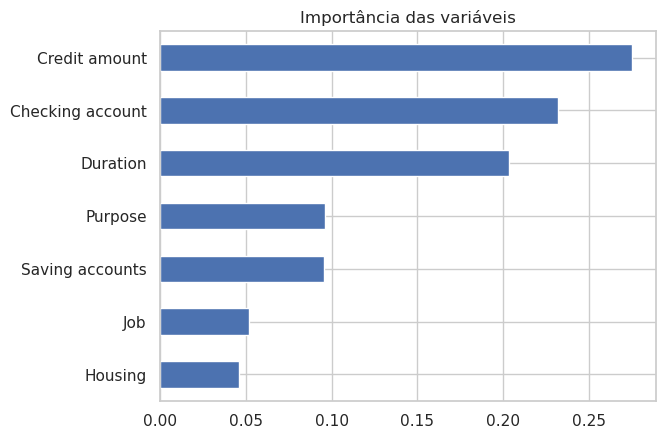

In [31]:
importances = pd.Series(modelo.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Importância das variáveis')
plt.show()

### O gráfico acima mostra a importância das variáveis para o modelo. As mais relevantes são: Credit amount, Checking account e Duration, enquanto Job e Housing têm menor influência na decisão do modelo.

### No próximo resultado, teremos a matriz de confusão para do modelo.

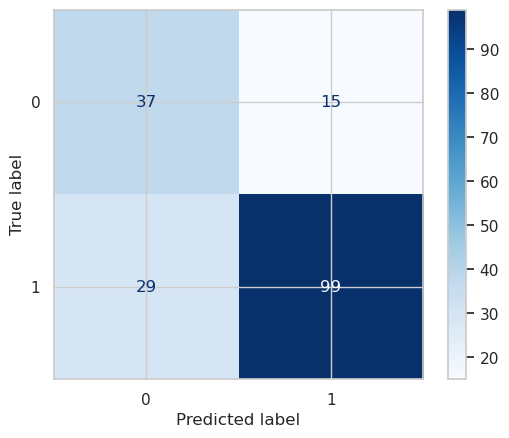

In [32]:
# predição 
y_pred = modelo.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

## Interpretação:

### - Verdadeiros Positivos (VP): 99  classe 1 corretamente prevista.

### - Verdadeiros Negativos (VN): 37  classe 0 corretamente prevista.

### Falsos Positivos (FP): 15 modelo previu 1, mas era 0.

### Falsos Negativos (FN): 29  modelo previu 0, mas era 1.

In [33]:

from sklearn.metrics import roc_auc_score, log_loss, roc_curve

# Gerar o score contínuo
y_score = modelo.predict_proba(X_test)[:, 1]  # probabilidade da classe positiva (bom pagador)

# qcut cria faixas de probabilidade 
ratings = pd.qcut(y_score, q=10, labels=False)  # 0 = pior risco, 9 = melhor risco

# Exibir distribuição dos Ratings
print("Distribuição dos Ratings:")
print(pd.Series(ratings).value_counts().sort_index())


# AUC - mede separação global
auc = roc_auc_score(y_test, y_score)

# KS - distância máxima entre as distribuições acumuladas de bons e maus pagadores
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label='good')

ks = max(tpr - fpr)

# LogLoss - mede calibração (quanto a probabilidade se aproxima da real)
logloss = log_loss(y_test, y_score)

print(f"\nMétricas de Avaliação:")
print(f"AUC      : {auc:.4f}")
print(f"KS       : {ks:.4f}")
print(f"LogLoss  : {logloss:.4f}")


Distribuição dos Ratings:
0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
dtype: int64

Métricas de Avaliação:
AUC      : 0.8389
KS       : 0.5421
LogLoss  : 0.4927


## Métricas de desempenho 

### Em vez de entregar apenas uma predição binária (bom/mau pagador), o modelo gera um Rating de 0 a 9, obtido pela discretização dos scores de probabilidade em decis. Essa abordagem permite classificar clientes em faixas de risco e definir estratégias de crédito diferenciadas para cada grupo, como limites e taxas personalizadas.

### Rating 0-3:  Risco Alto (40% piores)
### Rating 4-6:  Risco Médio (30% intermediários)  
### Rating 7-9:  Risco Baixo (30% melhores)

### AUC = 0.8389: indica alta capacidade de separação entre bons e maus pagadores.

### KS = 0.5421: mostra excelente distinção entre as distribuições de score das duas classes.

### LogLoss = 0.4927: revela boa calibração das probabilidades previstas.

## Vamos unir duas features com o objetivo de aumentar a acurácia do modelo ao treinar novamente

<Figure size 1500x800 with 0 Axes>

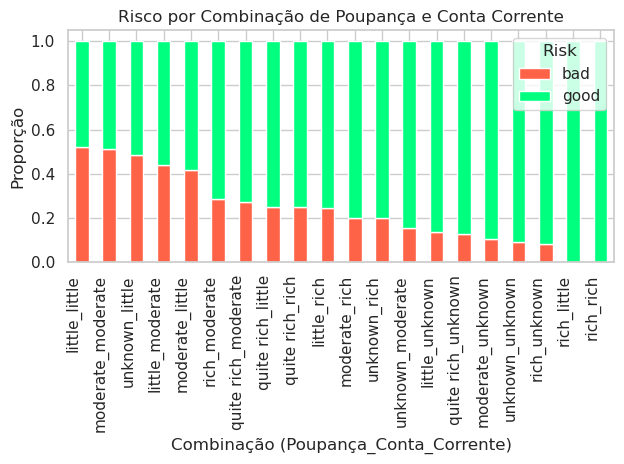

In [34]:
# Criando combinações estratégicas
data['Risk_Score_Combo'] = data['Saving accounts'] + '_' + data['Checking account']

plt.figure(figsize=(15, 8))
combo_risk = pd.crosstab(data['Risk_Score_Combo'], data['Risk'], normalize='index')
combo_risk_sorted = combo_risk.sort_values('bad', ascending=False)

combo_risk_sorted.plot(kind='bar', stacked=True, color=['tomato', 'springgreen'])
plt.title('Risco por Combinação de Poupança e Conta Corrente')
plt.xlabel('Combinação (Poupança_Conta_Corrente)')
plt.ylabel('Proporção')
plt.legend(title='Risk')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

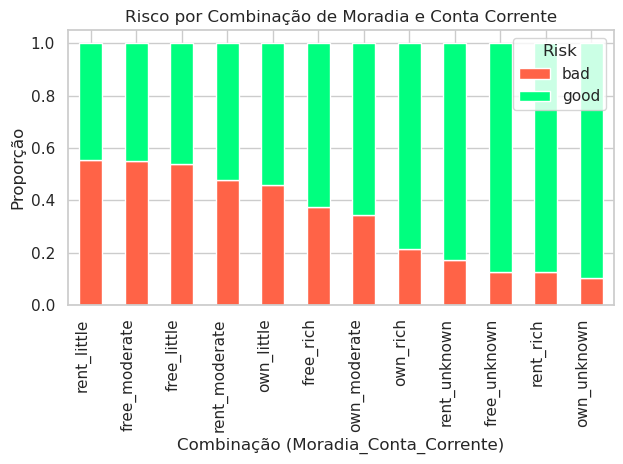

In [35]:
# Criando combinações estratégicas
data['Risk_Score_Combo2'] = data['Housing'] + '_' + data['Checking account']

plt.figure(figsize=(15, 8))
combo_risk = pd.crosstab(data['Risk_Score_Combo2'], data['Risk'], normalize='index')
combo_risk_sorted = combo_risk.sort_values('bad', ascending=False)

combo_risk_sorted.plot(kind='bar', stacked=True, color=['tomato', 'springgreen'])
plt.title('Risco por Combinação de Moradia e Conta Corrente')
plt.xlabel('Combinação (Moradia_Conta_Corrente)')
plt.ylabel('Proporção')
plt.legend(title='Risk')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

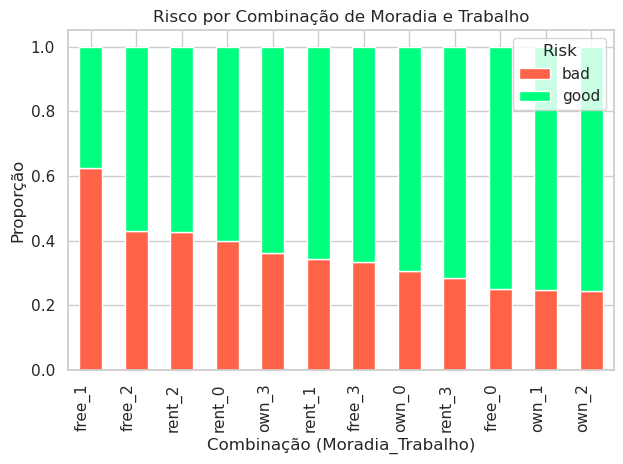

In [36]:
# Criando combinações estratégicas
data['Risk_Score_Combo3'] = data['Housing'] + '_' + data['Job'].astype(str)

plt.figure(figsize=(15, 8))
combo_risk = pd.crosstab(data['Risk_Score_Combo3'], data['Risk'], normalize='index')
combo_risk_sorted = combo_risk.sort_values('bad', ascending=False)

combo_risk_sorted.plot(kind='bar', stacked=True, color=['tomato', 'springgreen'])
plt.title('Risco por Combinação de Moradia e Trabalho')
plt.xlabel('Combinação (Moradia_Trabalho)')
plt.ylabel('Proporção')
plt.legend(title='Risk')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [37]:
data

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Risk_Score_Combo,Risk_Score_Combo2,Risk_Score_Combo3
0,2,own,unknown,little,1169,6,radio/TV,good,unknown_little,own_little,own_2
1,2,own,little,moderate,5951,48,radio/TV,bad,little_moderate,own_moderate,own_2
2,1,own,little,unknown,2096,12,education,good,little_unknown,own_unknown,own_1
3,2,free,little,little,7882,42,furniture/equipment,good,little_little,free_little,free_2
4,2,free,little,little,4870,24,car,bad,little_little,free_little,free_2
...,...,...,...,...,...,...,...,...,...,...,...
995,1,own,little,unknown,1736,12,furniture/equipment,good,little_unknown,own_unknown,own_1
996,3,own,little,little,3857,30,car,good,little_little,own_little,own_3
997,2,own,little,unknown,804,12,radio/TV,good,little_unknown,own_unknown,own_2
998,2,free,little,little,1845,45,radio/TV,bad,little_little,free_little,free_2


In [38]:
# preparando os dados 
df = data.copy() # Cria uma cópia do DataFrame original para não modificar os dados originais


### separando treino e teste

In [39]:
# Cria a variável X (features) removendo a coluna 'Risk' (todas as colunas exceto o target)
X = df.drop('Risk', axis=1) 

# Cria a variável y (target) com apenas a coluna 'Risk'
y = df['Risk']


# Divide os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)


# Identifica as colunas categóricas (do tipo texto/object)
cat_cols = X_train.select_dtypes('object').columns

# Cria o codificador
encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',  # evita erro se aparecer categoria nova no teste
    unknown_value=-1                     # valor usado para categorias desconhecidas
)

# Ajusta o encoder apenas com dados de treino e transforma ambos
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test[cat_cols]  = encoder.transform(X_test[cat_cols])


### criando e treinando o modelo

In [40]:
# modelo 
modelo = RandomForestClassifier(
    class_weight='balanced', # Cria o modelo com pesos balanceados
    n_estimators=300,   # número de árvores na floresta
    criterion="entropy",  # ganho de informação
    max_depth=10,    # profundidade máxima; None = sem limite
    min_samples_split=5,  # min samples para dividir um nó
    min_samples_leaf=4,  # min samples em uma folha
    max_features="sqrt", # número de features a considerar em cada split
    bootstrap=True,    # usar amostragem bootstrap
    oob_score=True,    # calcular oob_score (estimativa pela amostra fora do bootstrap)
    random_state=42, # semente
    n_jobs=-1         # usar todos os núcleos disponíveis
)


modelo.fit(X_train, y_train) # Treina o modelo usando os dados de treino (X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=300, n_jobs=-1,
                       oob_score=True, random_state=42)

In [41]:
print(classification_report(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

         bad       0.58      0.73      0.65        52
        good       0.88      0.79      0.83       128

    accuracy                           0.77       180
   macro avg       0.73      0.76      0.74       180
weighted avg       0.79      0.77      0.78       180



# Análise de Classificação (ajustar)

### O modelo apresentou uma acurácia de 77%, melhorou 1% em comparação com o treinamento anterior. 

### No próximo resultado, teremos a importância de cada feature. 

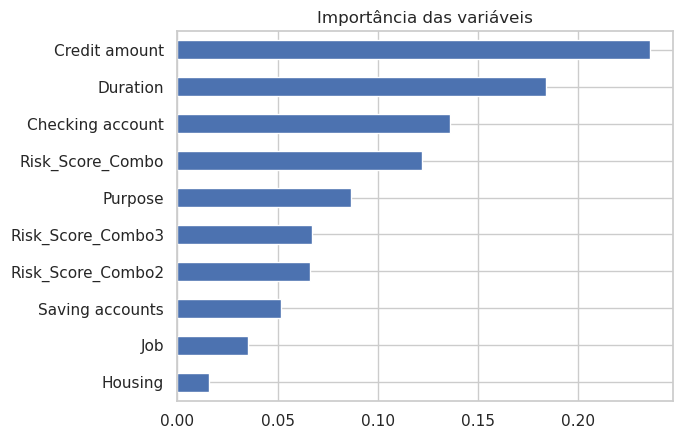

In [42]:
importances = pd.Series(modelo.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Importância das variáveis')
plt.show()

# Vamos comparar com o XGBoost (atualizando)

In [43]:
import xgboost as xgb

In [44]:
# preparando dados novamente

data2 = data.copy()